In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [45]:
np.random.seed(42)
days = np.arange(1, 101)  # 100 days
prices = 100 + 0.5 * days + 10 * np.sin(days * 0.1) + np.random.normal(0, 5, 100)

In [46]:
X = days.reshape(-1, 1)
y = prices

In [47]:
split = 80
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [48]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [49]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test_poly)
future_days = np.arange(101, 121).reshape(-1, 1)  # Predict 20 days ahead
future_poly = poly.transform(future_days)
future_pred = model.predict(future_poly)


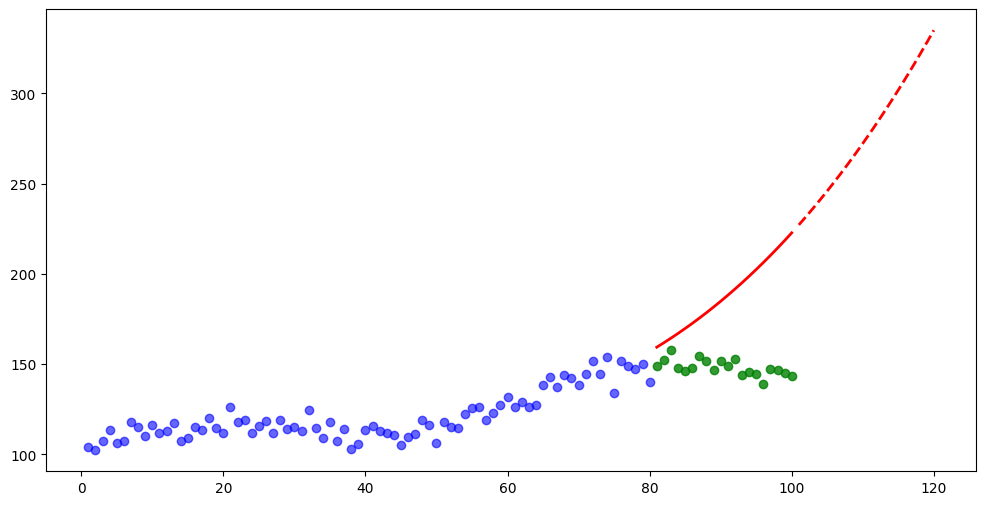

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(X_train.flatten(), y_train, 'bo', label='Training Data', alpha=0.6)
plt.plot(X_test.flatten(), y_test, 'go', label='Actual Test', alpha=0.8)
plt.plot(X_test.flatten(), y_pred, 'r-', label='Predictions', linewidth=2)
plt.plot(future_days.flatten(), future_pred, 'r--', label='Future Forecast', linewidth=2)

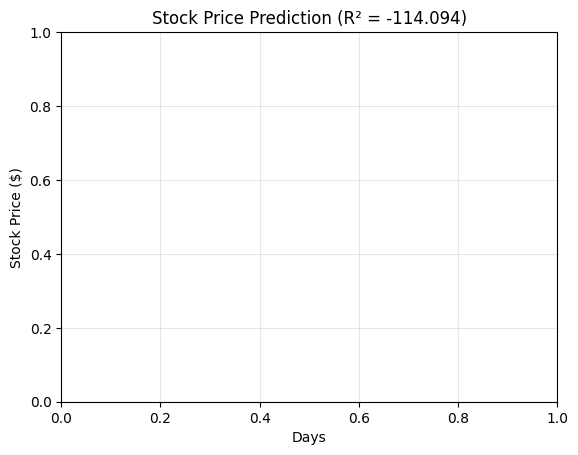

In [53]:
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title(f'Stock Price Prediction (R² = {r2_score(y_test, y_pred):.3f})')
# plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [55]:
print(f"Model Accuracy: {r2_score(y_test, y_pred):.3f}")
print(f"Next 5 days forecast: {future_pred[:5].round(2)}")

Model Accuracy: -114.094
Next 5 days forecast: [227.18 231.7  236.34 241.1  245.99]
